In [1]:
import  sys
sys.path = ['/data/xianliang/project_ctaintern/']+sys.path

import pandas as pd
import matplotlib.pyplot as plt
import pyelf.elutil as eu
import numpy as np
import datetime
import os
import pyelf.commodity_list as commlist

import Tools.MLTools as mltool
from Tools.Factor_Industry import *
from Tools.AutoFactor_FactorAnalysis_Helper import *
import itertools

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

print(plt.style.available)
plt.style.use('seaborn')


['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [2]:
outdir = '/data/xianliang/CTA/Exp-Demo/'
mltool.myMakeDir(outdir)
figpath = os.path.join(outdir, 'FactorExploration')

In [3]:
datadir = '/data/xianliang/project_ctaintern/data2016_left/zl/'
period = 5
cperiod = 5
dayed_time = datetime.time(15,0)


comms = commlist.comms_all


date_b = datetime.datetime(2016,1,1)

data_zl = mltool.CTA_LoadData_AutoFactor(datadir,period,aux_cols=['if_jy','amount','twap','vwap'],date_b=date_b,cols=comms,ref_ind=None,if_parquet=True)

O = data_zl['O'].copy()
C = data_zl['C'].copy()
H = data_zl['H'].copy()
L = data_zl['L'].copy()
V = data_zl['V'].copy()
I = data_zl['I'].copy()
amount = data_zl['amount'].copy()
if_jy = data_zl['if_jy'].copy()

In [4]:
cperiod = 5
dayed_time = datetime.time(15,0)

idf = C.copy()
cols_ = idf.columns.tolist()
idf['index'] = idf.index
idf['indexC'] = [ix+datetime.timedelta(minutes=cperiod) for ix in idf.index]

idf['day_clabel'] = 1*(idf['indexC'].apply(lambda x: x.time()) == dayed_time)

idf['day_olabel'] = idf['day_clabel'].shift(1)
idf.loc[idf.index[0], 'day_olabel'] = 1
day_group_label = idf['day_olabel'].cumsum().fillna(method='bfill')


# today dayclose
day_CC = C.copy()
day_CC.loc[idf['day_clabel']!=1, :] = np.nan
day_CC = day_CC.fillna(method='bfill')

# today dayopen
day_OO = O.copy()
day_OO.loc[idf['day_clabel'].shift(1)!=1, :] = np.nan
day_OO.loc[O.index[0], :] = O.loc[O.index[0], :]
day_OO = day_OO.fillna(method='ffill')

# yesterday dayclose
day_CC1 = C.copy()
day_CC1.loc[idf['day_clabel']!=1, :] = np.nan
day_CC1 = day_CC1.fillna(method='ffill')
day_CC1 = day_CC1.shift(1)

day_CC.head()

,a,ap,b,c,cf,cy,cs,jd,lh,m,...,v,ag,al,au,cu,ni,pb,sn,zn,si
index,,,,,,,,,,,,,,,,,,,,,
2016-01-04 09:00:00,3615.182312,8095.0,7420.511955,1940.967341,13235.215144,21515.0,2169.745682,3428.984671,26810.0,3589.285671,...,3360.748351,3006.521678,8496.233117,213.836832,40022.44095,67894.605877,12131.604577,88174.247613,10585.64878,18310.0
2016-01-04 09:05:00,3615.182312,8095.0,7420.511955,1940.967341,13235.215144,21515.0,2169.745682,3428.984671,26810.0,3589.285671,...,3360.748351,3006.521678,8496.233117,213.836832,40022.44095,67894.605877,12131.604577,88174.247613,10585.64878,18310.0
2016-01-04 09:10:00,3615.182312,8095.0,7420.511955,1940.967341,13235.215144,21515.0,2169.745682,3428.984671,26810.0,3589.285671,...,3360.748351,3006.521678,8496.233117,213.836832,40022.44095,67894.605877,12131.604577,88174.247613,10585.64878,18310.0
2016-01-04 09:15:00,3615.182312,8095.0,7420.511955,1940.967341,13235.215144,21515.0,2169.745682,3428.984671,26810.0,3589.285671,...,3360.748351,3006.521678,8496.233117,213.836832,40022.44095,67894.605877,12131.604577,88174.247613,10585.64878,18310.0
2016-01-04 09:20:00,3615.182312,8095.0,7420.511955,1940.967341,13235.215144,21515.0,2169.745682,3428.984671,26810.0,3589.285671,...,3360.748351,3006.521678,8496.233117,213.836832,40022.44095,67894.605877,12131.604577,88174.247613,10585.64878,18310.0


多空因子检验

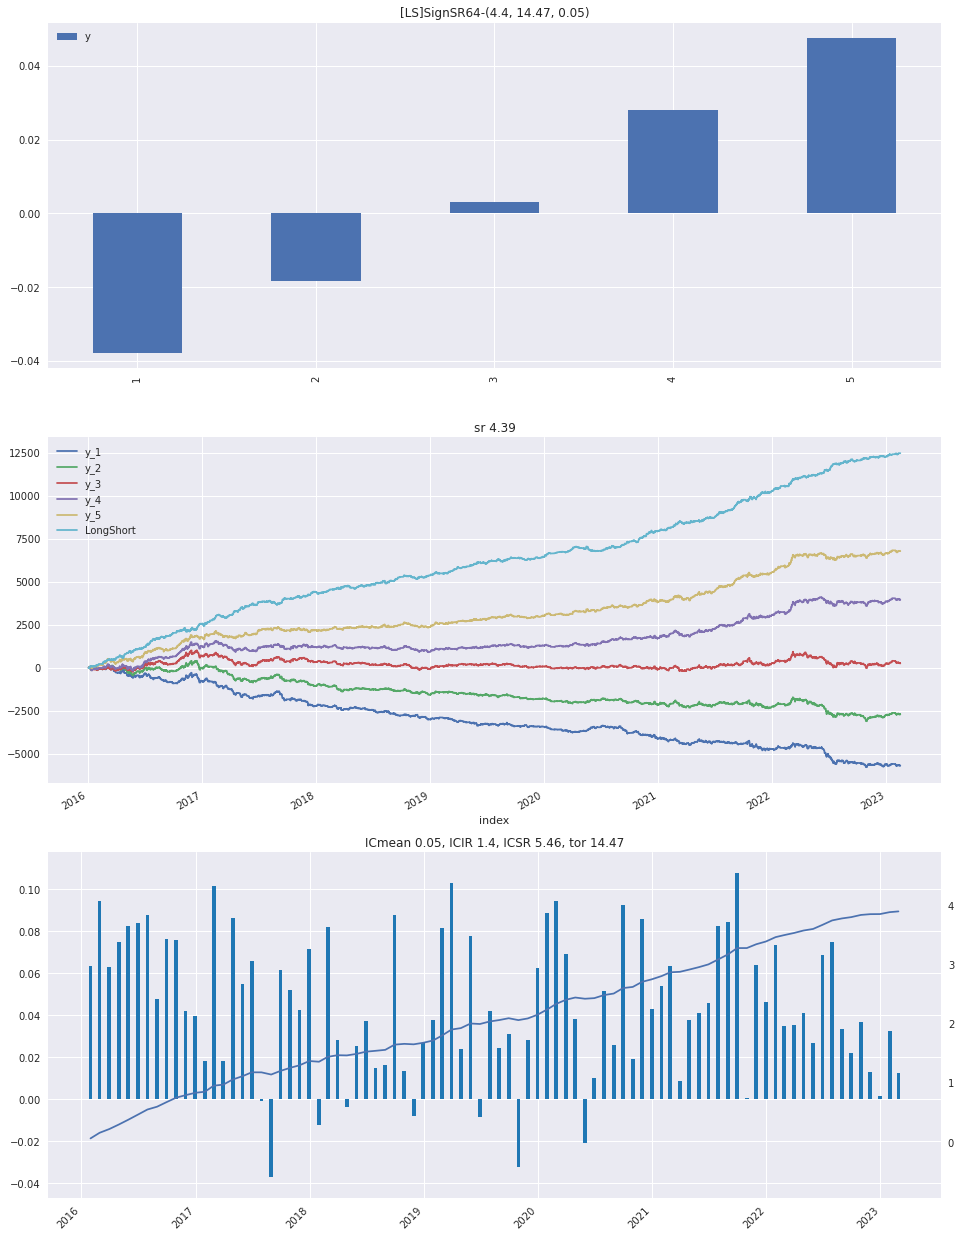

In [5]:
'''
多空因子检验
'''
factorname = 'SignSR'

xp = 64

factordf, name_ = eval(factorname)(data_zl, xp)


ydf = 100.0*(day_CC/C-1)

cuts = 5
factordf[if_jy==0] = np.nan

name_, icvalue, deltanp, sr, factor_group = mltool.FactorPerform(factordf, ydf, plt_ycol='', bin_ycols=[], cuts=cuts, ifqcut=True, if_savefig=True, figpath=figpath, nameflag_='[LS]%s'%name_, if_show_ls=True, ic_mode=1, plt_date=None)


因子相关性检验 因子值 vs dailyGP

In [6]:
factorlist = ['SignSR','SignEMASR','bia','kline_divergence']

xps = [64]

allparas = list(itertools.product(factorlist, xps))

results = eu.multiprocess(GetFactor, paras=allparas, n_processes=min(50, len(allparas)), data=data_zl)

factordf_list = list()
name_list = list()
for ifactordf, iname in results:
    factordf_list.append(ifactordf)
    name_list.append(iname)

factordf_dict = dict(zip(name_list, factordf_list))

In [7]:
factordfnm_list = eu.multiprocess(factor_hznm, paras=factordf_list, n_processes=min(50, len(factordf_list)), if_med_cut=True, if_jy=data_zl['if_jy'])
factordfnm_dict = dict(zip(name_list, factordfnm_list))

In [8]:
corrdf = GetCorrMatrix(factordfnm_dict, type='val', ydf0=None)
corrdf

,SignSR64,SignEMASR64,bia64,kline_divergence64
SignSR64,1.0,0.862226,0.800439,0.564528
SignEMASR64,0.862226,1.0,0.905378,0.451678
bia64,0.800439,0.905378,1.0,0.331024
kline_divergence64,0.564528,0.451678,0.331024,1.0


In [9]:
ydf0 = 100.0*(day_CC/C-1)
corrdf_gp = GetCorrMatrix(factordfnm_dict, type='gp', ydf0=ydf0)
corrdf_gp

,SignSR64,SignEMASR64,bia64,kline_divergence64
SignSR64,1.0,0.800641,0.778649,0.520719
SignEMASR64,0.800641,1.0,0.920147,0.424006
bia64,0.778649,0.920147,1.0,0.32255
kline_divergence64,0.520719,0.424006,0.32255,1.0
